In [162]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.api as sm



In [163]:
from ISLP import load_data

Auto = load_data('Auto')
y = Auto['mpg']
X = sm.add_constant(Auto['horsepower'])



In [164]:
model = sm.OLS(y, X).fit()

In [165]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        11:29:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

# 1.
- There is relationship between the predictor and the response but meduim strong because R-squared:0.606, b1 value is -0.1578
- y = 39.9359 - 0.1578*housepower 
- Close to linier regression, if r^2 close to 1 it is strong and close to 0 is not strong relationship. In our case R-squared:0.606 and relationship is medium.

- Also p values are close to 0.
- Relationship between the predictor and the response is negative (-0.1578)


In [166]:
print(model.conf_int(alpha=0.5))
X_pred = model.predict([1,98])
print(X_pred)
pred = model.get_prediction(pd.DataFrame({"const": 1, "horsepower": 98}, index=[0]))
print(pred.conf_int(alpha=0.1))


                    0          1
const       39.451464  40.420258
horsepower  -0.162196  -0.153493
[24.46707715]
[[24.05280331 24.88135099]]


- b1 in [39.451464 , 40.420258]
- b0 in [-0.162196 , -0.153493]

- Confidence Interval=Point Estimate±Margin of Error
- Confidence Interval=Point Estimate±Critical Value×Standard Error


In [167]:
from scipy.stats import norm, t

confidence_level = 0.95
alpha = 1 - confidence_level

# For Z-distribution (standard normal)
z_critical = norm.ppf(1 - alpha/2)

# For t-distribution 
t_critical = t.ppf(1 - alpha/2, 98)

z_critical, t_critical

(1.959963984540054, 1.984467454426692)

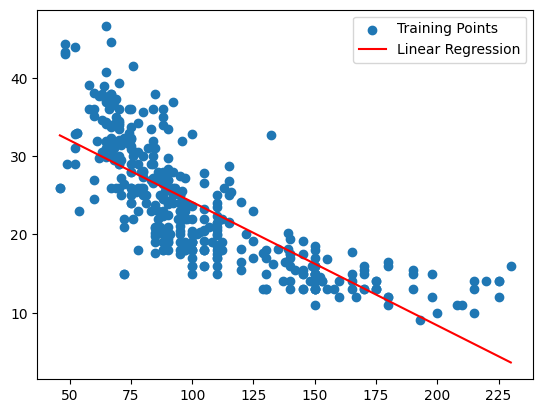

In [168]:
import numpy as np
Xtest =sm.add_constant(pd.DataFrame(np.linspace(Auto['horsepower'].min(),Auto['horsepower'].max(),num=1000)))
ypreds = model.predict(Xtest)
plt.scatter(Auto['horsepower'],Auto['mpg'])
plt.plot(Xtest[0],ypreds, c='red')
plt.legend(['Training Points','Linear Regression'])
plt.show()

In [169]:
y = Auto['mpg']
x = Auto['horsepower']
degree = 2
X_poly = np.column_stack([x**i for i in range(1, degree + 1)])
X_poly = sm.add_constant(X_poly)
model = sm.OLS(y,X_poly).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           5.40e-99
Time:                        11:29:33   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0

y=β0 + β1* x + β2 * x^2
- mpg = 56.9001 - 0.4662*hp + 0.0012*hp^2

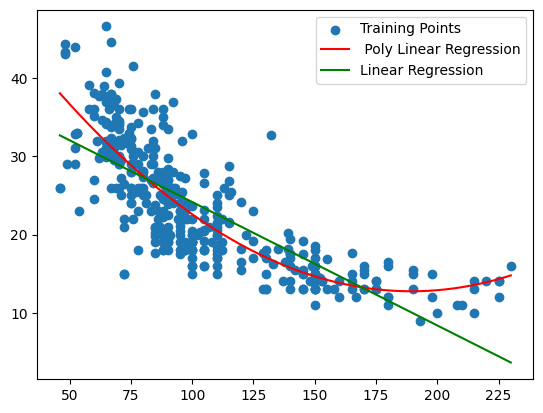

In [170]:
Xtest = np.linspace(Auto['horsepower'].min(),Auto['horsepower'].max(),num=1000)
Xtest = np.column_stack([Xtest**i for i in range(1, degree + 1)])
Xtest = sm.add_constant(pd.DataFrame(Xtest))
ypreds = model.predict(Xtest)
plt.scatter(Auto['horsepower'],Auto['mpg'])
plt.plot(Xtest[0],ypreds, c='red')
plt.plot(Xtest[0],(39.9359 - 0.1578* Xtest[0]), c='green')
plt.legend(['Training Points',' Poly Linear Regression', 'Linear Regression'])
plt.show()


In [171]:
carseats = pd.read_csv('carseats.csv')


In [172]:
y = carseats['Sales']
X_quantiative = carseats[['Price']]
X_qualitative = pd.get_dummies(carseats[['Urban','US']], drop_first=True)
X = sm.add_constant(pd.concat([X_quantiative, X_qualitative], axis=1))
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.39e-23
Time:                        11:29:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

- Sales = 13.0435 - 0.0545 * Price - 0.093 * Urban + 1.2006 * US

In [173]:
X

,const,Price,Urban_Yes,US_Yes
0,1.0,120,1,1
1,1.0,83,1,1
2,1.0,80,1,1
3,1.0,97,1,1
4,1.0,128,1,0
...,...,...,...,...
395,1.0,128,1,1
396,1.0,120,0,1
397,1.0,159,1,1
398,1.0,95,1,1


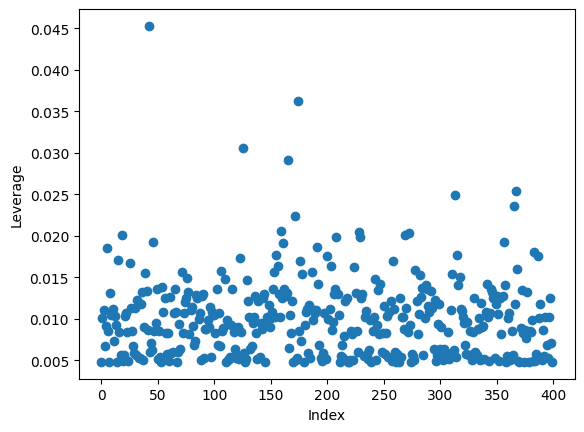

In [174]:
infl1 = model.get_influence()
plt.scatter(np.arange(X.shape[0]), infl1.hat_matrix_diag)
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.show()


In [175]:
boston = pd.read_csv('Boston.csv')

In [176]:

y = boston['crim']
X =sm.add_constant(boston[['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv']])
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           2.03e-56
Time:                        11:29:34   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

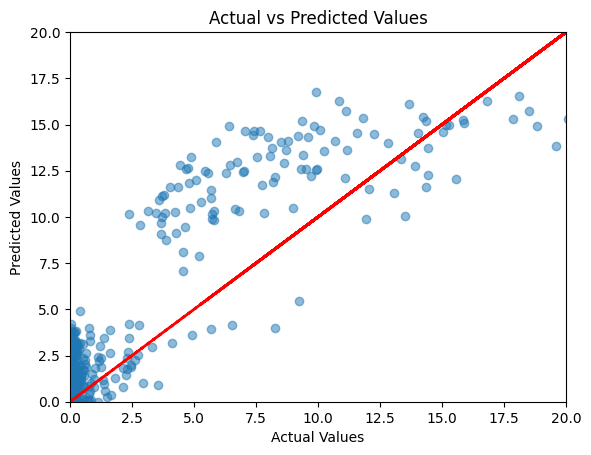

In [177]:
import seaborn as sns
plt.scatter(x=y, y=y_pred, alpha=0.5)
plt.plot(y, y, color='red', linestyle='dashed', linewidth=2)
plt.xlim(0, 20)  # Adjust the x-axis limits
plt.ylim(0, 20)  # Adjust the y-axis limits
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()